# Feature detection

### Feature Detection Overview

Feature detection is a key aspect of image processing used to identify and track key points in an image, such as corners or edges. In this notebook, we explore two main feature detection methods: **Harris Corner Detection** and **Shi-Tomasi** (Good Features to Track) detection.

---

### Harris Corner Detection

The **Harris Corner Detector** is a well-known corner detection method used to identify regions of interest where there are significant changes in intensity (corners). The idea is that a corner can be detected when moving the window in any direction causes a significant change in intensity.

**Key Parameters in `cv2.cornerHarris`:**
- `src`: The input image, which must be grayscale.
- `blockSize`: It determines the size of the neighborhood considered for corner detection. A larger block size means the algorithm will look for larger structures.
- `ksize`: Aperture parameter for the Sobel operator, used internally to calculate derivatives. Common values are 3 or 5.
- `k`: Harris detector free parameter, typically in the range [0.04, 0.06]. It affects the sensitivity to corner detection. Higher values may detect fewer corners but with more certainty.

**Steps to Use Harris Corner Detection:**
1. Convert the image to grayscale.
2. Apply `cv2.cornerHarris` to detect corners.
3. Threshold the response to isolate the most significant corners.
4. Draw the detected corners on the original image for visualization.

---

### Shi-Tomasi Corner Detection (Good Features to Track)

The **Shi-Tomasi Corner Detection** is an improved version of the Harris detector. Instead of using the determinant of the gradient matrix like Harris, Shi-Tomasi selects the minimum eigenvalue for corner detection, making it more accurate for certain types of images.

**Key Parameters in `cv2.goodFeaturesToTrack`:**
- `image`: The input grayscale image.
- `maxCorners`: The maximum number of corners to return. Use `0` to return all corners found.
- `qualityLevel`: The minimum accepted quality of image corners, in the range [0,1]. It is a multiplier for the best corner score; corners with a lower score than this value are ignored.
- `minDistance`: The minimum Euclidean distance between detected corners. It ensures that the corners detected are not too close to each other.
- `blockSize`: The size of the neighborhood for corner detection.

**Steps to Use Shi-Tomasi Detection:**
1. Convert the image to grayscale.
2. Use `cv2.goodFeaturesToTrack` to detect the strongest corners.
3. Draw the detected corners on the image.

---

### Comparison of Harris and Shi-Tomasi

- **Harris Corner Detector** is sensitive to noise and may detect more corners in areas with high texture. It is also less robust in images with uneven lighting or noise.
- **Shi-Tomasi Corner Detector** is more robust for tracking corners and is generally considered an improvement over Harris. It tends to perform better in real-world scenarios, especially in noisy or unevenly lit images.

By comparing both methods on the same image (e.g., the Lego image), you can visually assess how each method performs in terms of corner detection and precision.


## Harris Corner detection

As always we start with the imports

In [82]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

To start, we will use the same checkerboard image as earlier.

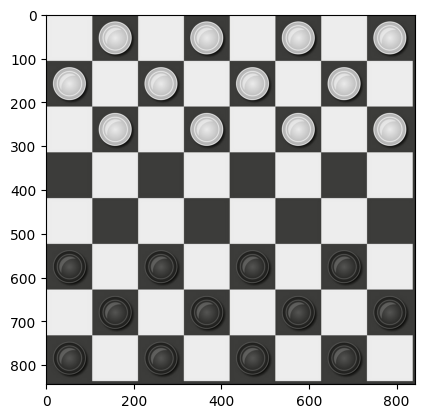

In [83]:
img = cv2.imread('checkers.png')
# Changing the order from bgr to rgb so that matplotlib can show it
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
plt.imshow(img)

### Exercise 2a
Fill in the missing code in the next block. We would like to detect the corners of the image using the OpenCV function [`cv2.cornerHarris`](https://docs.opencv.org/4.7.0/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345). Afterwards we want to draw the location of the detected corners on the image and display it.

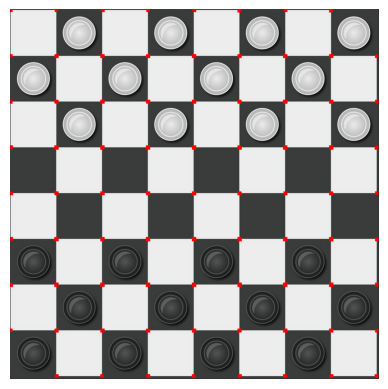

In [84]:
# Load the image (assuming the variable 'img' is already defined)
# Convert image to grayscale for corner detection
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Harris Corner Detection requires a float32 image format, so we convert the grayscale image
gray = np.float32(gray)

# Apply the Harris corner detector
# Parameters:
# - blockSize: The size of the neighborhood considered for corner detection (2x2 neighborhood)
# - ksize: Aperture parameter for the Sobel operator used for gradients (3x3 Sobel kernel)
# - k: Harris detector free parameter in the equation (0.04 is a common value)
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

# Dilate the detected corners to make them more visible by thickening the corner points
dst = cv2.dilate(dst, None, iterations=3)

# Thresholding: Mark corners with red color in the original image
# This marks pixels where the Harris response is greater than 1% of the maximum response
img[dst > 0.01 * dst.max()] = [0, 0, 255]  # Marks the corners in red (BGR format: [255, 0, 0])

# Display the result using Matplotlib
# Convert BGR to RGB format for proper display in Matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis display for a cleaner output
plt.show()


## Shi-Tomasi
Next we will try the Shi-Tomasi feature detection method. In OpenCV, that method is implemented as [`cv2.goodFeaturesToTrack`](https://docs.opencv.org/4.7.0/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541). 
Let's start with a different image this time.

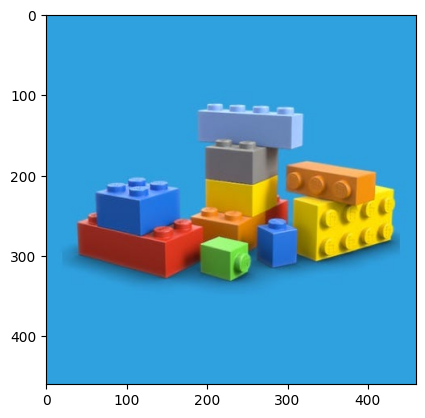

In [85]:
img = cv2.imread('Lego.jpg')
# Changing the order from bgr to rgb so that matplotlib can show it
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
plt.imshow(img)

### Exercise 2b
Just like the previous exercise, detect the corners of the image by inserting the missing code, this time using the Shi-Tomasi (good features to track) method. Draw the detected corners on the image. Check the documentation of the function for help.

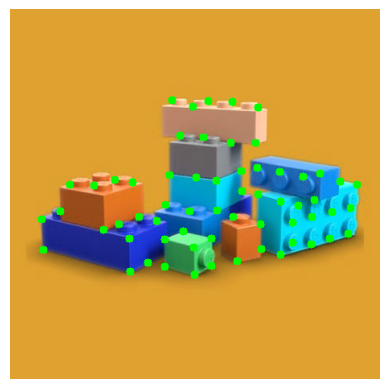

In [86]:
# Load the image (assuming the variable 'img' is already defined)
# Convert image to grayscale for corner detection
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Use the goodFeaturesToTrack function to detect corners
corners = cv2.goodFeaturesToTrack(gray, maxCorners=70, qualityLevel=0.01, minDistance=20)

# Convert the corner points to integer values
if corners is not None:
    corners = corners.astype(np.int32)  # Corrected line to convert to integers

    # Draw the detected corners on the original image
    for corner in corners:
        x, y = corner.ravel()  # Flatten the array to get x, y coordinates
        cv2.circle(img, (x, y), 5, (0, 255, 0), -1)  # Draw a circle with a radius of 5 and fill it

# Display the result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis display for a cleaner output
plt.show()

### Exercise 2c
Do a Harris corner detection on the same Lego image and compare the result with the Shi-Tomasi image.

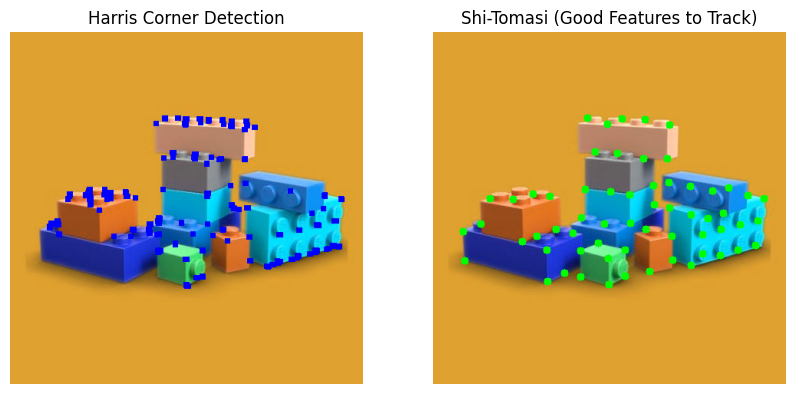

In [88]:
# Reload the image for Harris corner detection (to avoid overlapping with the previous drawing)
img_harris = cv2.imread('Lego.jpg')
# Convert from BGR to RGB for display
b,g,r = cv2.split(img_harris)
img_harris = cv2.merge([r,g,b])

# Convert image to grayscale for corner detection
gray_harris = cv2.cvtColor(img_harris, cv2.COLOR_RGB2GRAY)

# Harris Corner Detection requires a float32 image format, so we convert the grayscale image
gray_harris = np.float32(gray_harris)

# Apply the Harris corner detector
# Parameters:
# - blockSize: The size of the neighborhood considered for corner detection (2x2 neighborhood)
# - ksize: Aperture parameter for the Sobel operator used for gradients (3x3 Sobel kernel)
# - k: Harris detector free parameter in the equation (0.04 is a common value)
dst_harris = cv2.cornerHarris(src=gray_harris, blockSize=2, ksize=3, k=0.04)

# Dilate the detected corners to make them more visible by thickening the corner points
dst_harris = cv2.dilate(dst_harris, None, iterations=3)

# Thresholding: Mark corners with red color in the original image
img_harris[dst_harris > 0.01 * dst_harris.max()] = [255, 0, 0]  # Marks the corners in red (BGR format)

# Display the Harris result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_harris, cv2.COLOR_BGR2RGB))
plt.title("Harris Corner Detection")
plt.axis('off')

# Reload the Shi-Tomasi result for comparison
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Shi-Tomasi (Good Features to Track)")
plt.axis('off')

# Show both results side by side for comparison
plt.show()